# Tutorial

## Decorators

### @timeit_arg_info_dec
**New in v0.1.0**


`timeit_arg_info_dec` is a decorator that decorates a function when it runs, by printing its used parameters, their arguments, the execution time and the output of that function.
This can help e.g. with debugging.

In [2]:
from typing import List
from time import sleep

import pandas as pd

from extra_ds_tools.decorators.func_decorators import timeit_arg_info_dec

@timeit_arg_info_dec(round_seconds=1)
def illustrate_decorater(a_number: int, 
                         text: str,
                         lst: List[int],
                         df: pd.DataFrame,
                         either: bool = True,
                         *args,
                         **kwargs):
    sleep(1)
    return "Look how informative!"

illustrate_decorater(42, 'Bob', list(range(100)), pd.DataFrame([list(range(1,10))]), either=False, **{'Even': 'this works!'})


illustrate_decorater()
---------------------------------------------------------------------------------------------------------------------------------
    param          type_hint                    default_value    arg_type                     arg_value                 arg_len
--  -------------  ---------------------------  ---------------  ---------------------------  ------------------------  ---------
 0  a_number       int                                           int                          42
 1  text           str                                           str                          Bob                       3
 2  lst            List[int]                                     list                         [0, 1, 2,  .. 7, 98, 99]  100
 3  df             pandas.core.frame.DataFrame                   pandas.core.frame.DataFrame                            (1, 9)
 4  either         bool                         True             bool                         False
 5  kwarg['Even'] 

'Look how informative!'

For the full documentation of `timeit_arg_info_dec` click [here](https://extra-datascience-tools.readthedocs.io/en/latest/autoapi/extra_ds_tools/decorators/func_decorators/index.html#extra_ds_tools.decorators.func_decorators.timeit_arg_info_dec).

## Plots

### stripboxplot
**New in v0.2.0**

`stripboxplot` is a plot which combines seaborn's boxplot and stripplot into one plot and adds extra count information using extra-datascience-tool's `add_counts_to_yticks` and `add_counts_to_xticks`. 

In [4]:
# import libraries
import pandas as pd
import numpy as np

from extra_ds_tools.plots.eda import stripboxplot
from numpy.random import default_rng

# generate data
rng = default_rng(42)
cats = ['Cheetah', 'Leopard', 'Puma']
cats = rng.choice(cats, size=1000)
cats = np.append(cats, [None]*102)
weights = rng.integers(25, 100, size=1000)
weights = np.append(weights, [np.nan]*100)
weights = np.append(weights, np.array([125,135]))
rng.shuffle(cats)
rng.shuffle(weights)
df = pd.DataFrame({'cats': cats, 'weights': weights})
df.head()

,cats,weights
0,Cheetah,86.0
1,Puma,38.0
2,Puma,68.0
3,None,NaN
4,Puma,36.0


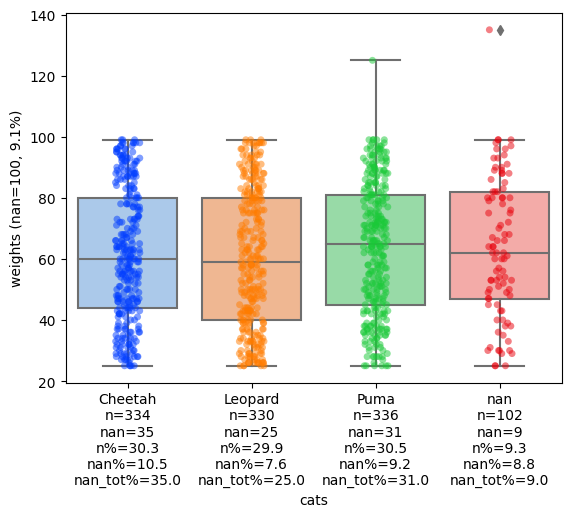

In [5]:
# run stripboxplot
fig, ax = stripboxplot(df, 'cats', 'weights')

For the full documentation of `stripboxplot` click [here](https://extra-datascience-tools.readthedocs.io/en/latest/autoapi/extra_ds_tools/plots/eda/index.html#extra_ds_tools.plots.eda.stripboxplot).

### add_counts_to_xticks
**New in v0.3.0**

`add_counts_to_xticks` is a function which add count statistics of a categorical variable on the x-axis of a plot. If the categorical variable is on the y-axis you can use `add_counts_to_yticks` instead.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from extra_ds_tools.plots.format import add_counts_to_xticks
from numpy.random import default_rng

# generate data
rng = default_rng(42)
cats = ['Cheetah', 'Leopard', 'Puma']
cats = rng.choice(cats, size=1000)
cats = np.append(cats, [None]*102)
weights = rng.integers(25, 100, size=1000)
weights = np.append(weights, [np.nan]*100)
weights = np.append(weights, np.array([125,135]))
rng.shuffle(cats)
rng.shuffle(weights)
df = pd.DataFrame({'cats': cats, 'weights': weights})
df.head()

,cats,weights
0,Cheetah,86.0
1,Puma,38.0
2,Puma,68.0
3,None,NaN
4,Puma,36.0


Create e.g. a violinplot

<AxesSubplot: xlabel='cats', ylabel='weights'>

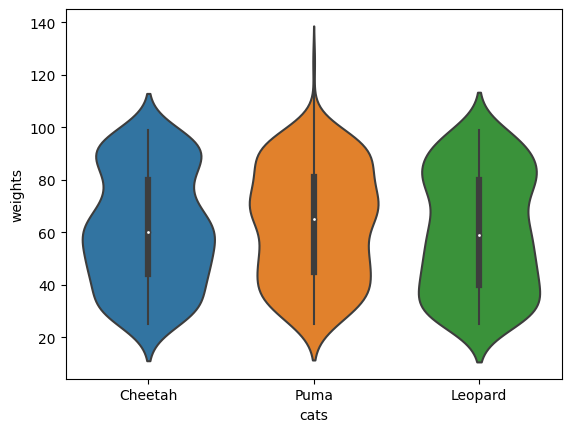

In [2]:
fig, ax = plt.subplots()
sns.violinplot(df, x='cats', y='weights', ax=ax)

Add counts to the x-ticks

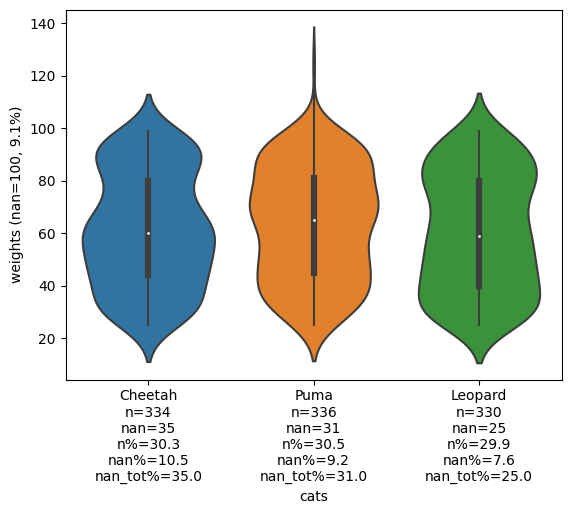

In [3]:
fig, ax = add_counts_to_xticks(fig, ax, df, x_col='cats', y_col='weights')
fig

For the full documentation of `add_counts_to_xticks` click [here](https://extra-datascience-tools.readthedocs.io/en/latest/autoapi/extra_ds_tools/plots/format/index.html#extra_ds_tools.plots.format.add_counts_to_xticks).

### try_diff_distribution_plots
**New in v0.3.0**

`try_diff_distribution_plots` is a function which performs different transformations to a list of numerical values and plots the histogram, probability and the boxplot for each transformation.

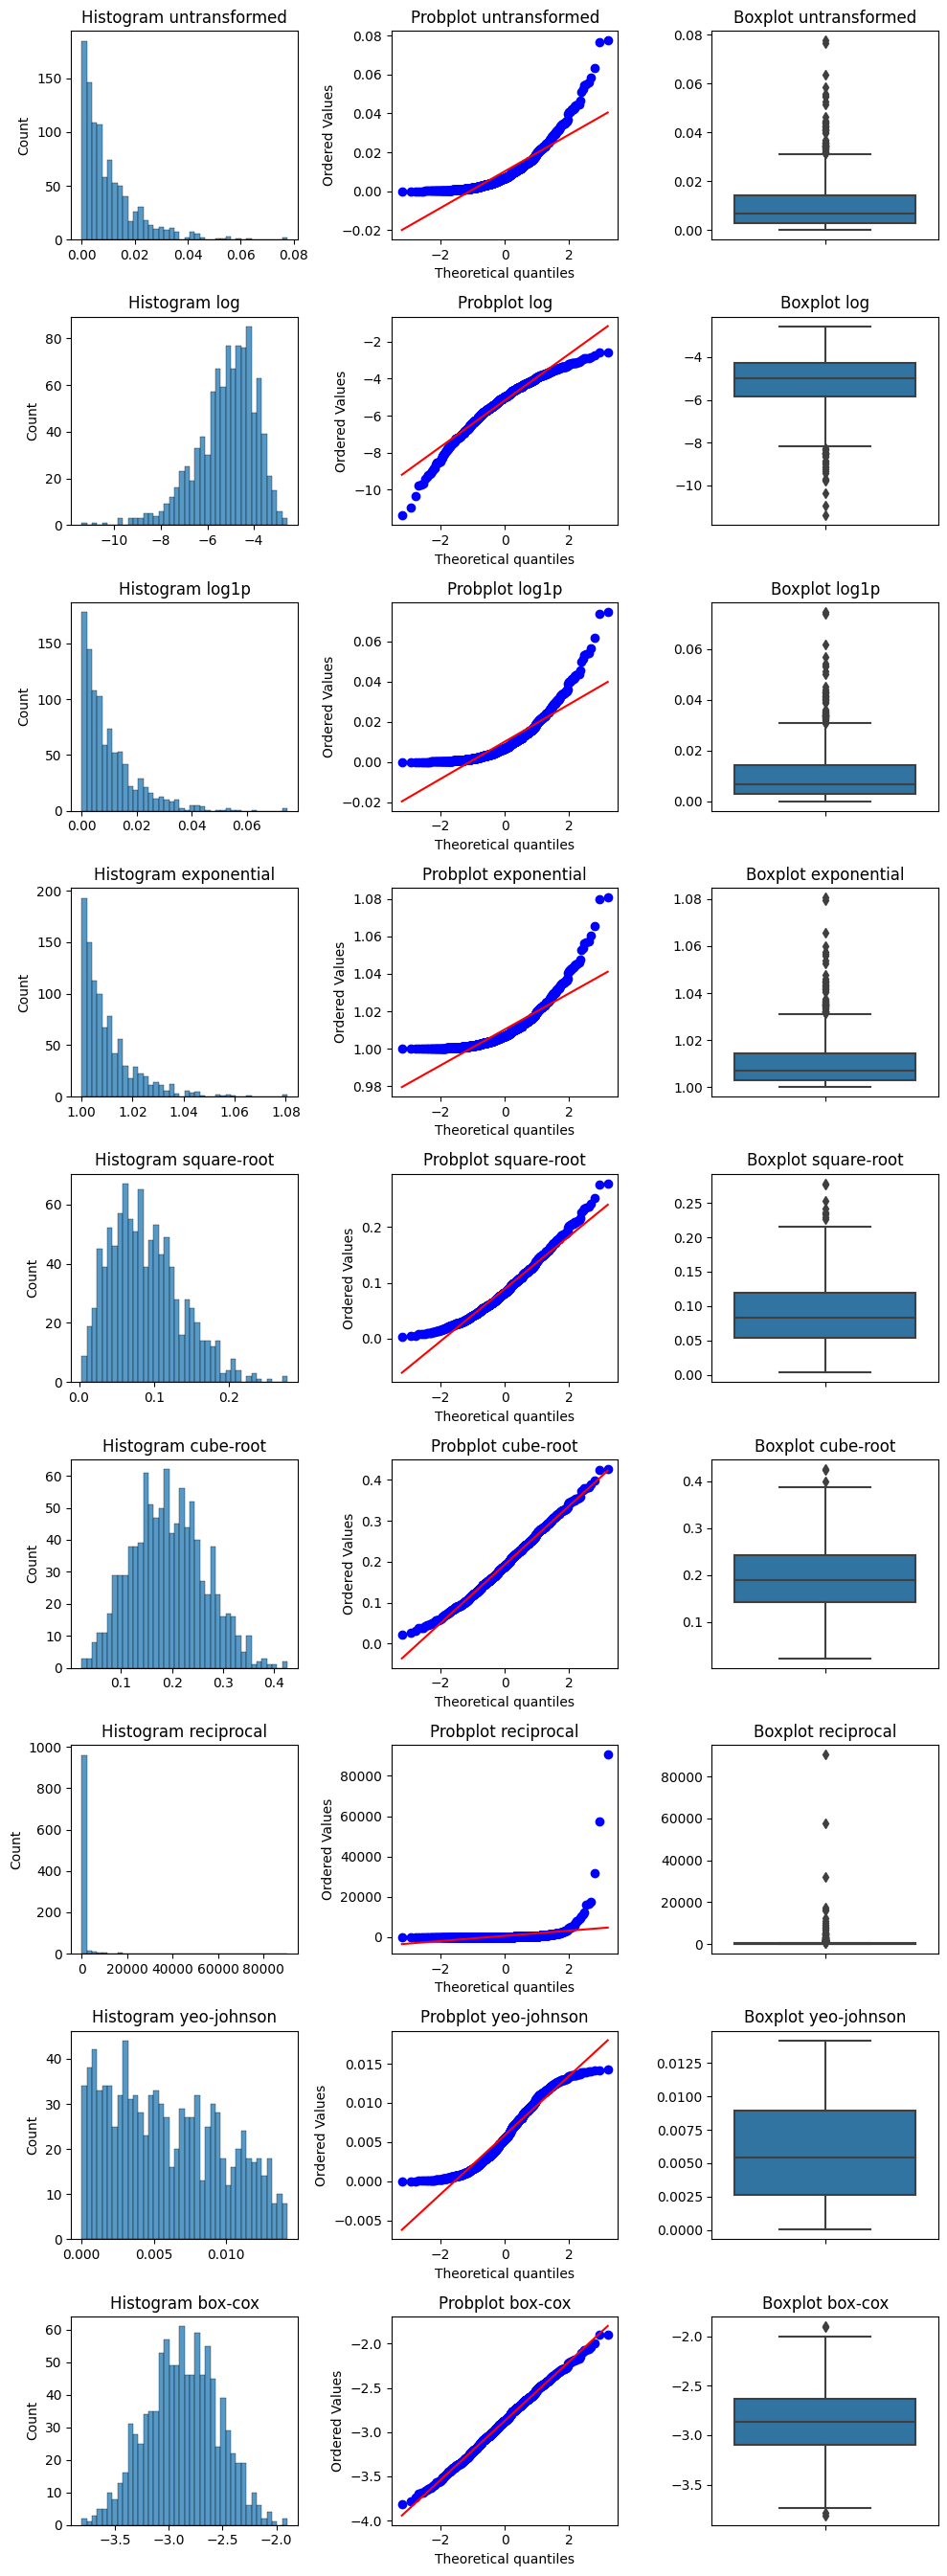

In [1]:
from numpy.random import default_rng
from extra_ds_tools.plots.eda import try_diff_distribution_plots

rng = default_rng(42)
values = rng.pareto(a=100, size=1000)

fig, axes, transformed_values = try_diff_distribution_plots(values, hist_bins=40)

For the full documentation of `try_diff_distribution_plots` click [here](https://extra-datascience-tools.readthedocs.io/en/latest/autoapi/extra_ds_tools/plots/eda/index.html#extra_ds_tools.plots.eda.try_diff_distribution_plots).

## ML

### filter_tried_params
**New in v0.4.0**

`filter_tried_params` is a function which filters out previously tried parameters in a `GridSearchCV` if the model is otherwise identical. This can save a lot of time because you won't be rerunning already tried settings.

In [1]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

from extra_ds_tools.ml.sklearn.model_selection import filter_tried_params

model = make_pipeline(DecisionTreeRegressor())

new_param_grid = {
    "decisiontreeregressor__max_depth": [1, 2],
    "decisiontreeregressor__splitter": ["best", "random"],
}
new_gridsearch = GridSearchCV(model, new_param_grid)

# initiate two other GridsearchCVs, we assume we have ran them already
tried_param_grid1 = {
    "decisiontreeregressor__max_depth": [2, 3],
    "decisiontreeregressor__splitter": ["best", "random"],
}
tried_param_grid2 = {
    "decisiontreeregressor__max_depth": [3, 4],
    "decisiontreeregressor__splitter": ["best", "random"],
}
tried_gridsearches = [
    GridSearchCV(model, tried_param_grid1),
    GridSearchCV(model, tried_param_grid2)
]

# change the param grid of the new GridSearchCV to the filtered param grid
untried_param_grid = filter_tried_params(gridsearchcv=new_gridsearch, tried_gridsearches=tried_gridsearches)
new_gridsearch.param_grid = untried_param_grid
new_gridsearch.param_grid


[{'decisiontreeregressor__max_depth': [1],
  'decisiontreeregressor__splitter': ['best']},
 {'decisiontreeregressor__max_depth': [1],
  'decisiontreeregressor__splitter': ['random']}]

As you can see above, the new `GridSearchCV` will only run the two new options it hasn't tried before.

For the full documentation of `filter_tried_params` click [here](https://extra-datascience-tools.readthedocs.io/en/latest/autoapi/extra_ds_tools/ml/sklearn/model_selection.index.html#extra_ds_tools.ml.sklearn.model_selection/filter_tried_params).

### EstimatorSwitch
**New in v0.5.0**

`EstimatorSwitch` is a meta-estimator that can turn on or off other estimators/transformers in a scikit-learn `Pipeline`. This can e.g. be useful when testing for the impact of a feature-engineering estimator/transformer with a `GridSearchCV`.

In [1]:
# import libraries
import numpy as np

from sklearn.pipeline import Pipeline
from feature_engine.imputation import MeanMedianImputer, ArbitraryNumberImputer

from extra_ds_tools.ml.sklearn.meta_estimators import EstimatorSwitch

# create X and y
X = np.array([np.nan, 10] * 5).reshape(-1,1)
y = np.array([5, 10] * 5).reshape(-1, 1)

# create pipeline steps
pipeline = Pipeline(
    [("medianimputer", EstimatorSwitch(MeanMedianImputer(), apply=False)), 
    ("arbitraryimputer", EstimatorSwitch(ArbitraryNumberImputer(-1), apply=True))]
)

# transform X according to pipeline
pipeline.fit_transform(X)

,x0
0,-1.0
1,10.0
2,-1.0
3,10.0
4,-1.0
5,10.0
6,-1.0
7,10.0
8,-1.0
9,10.0


Above you can see that the `nan` values have not been imputed with the mean: `10`, but with the arbitrary number `-1` because we used `EstimatorSwitch` to turn off the `MeanMedianImputer`.

To use `EstimatorSwitch` to turn off estimators/transformers during a `GridSearchCV`:

In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from feature_engine.imputation import MeanMedianImputer, ArbitraryNumberImputer

from extra_ds_tools.ml.sklearn.meta_estimators import EstimatorSwitch

In [3]:
clf = Pipeline(
    [("meanmedianimputer", EstimatorSwitch(MeanMedianImputer())), 
    ("arbitraryimputer", EstimatorSwitch(ArbitraryNumberImputer(-1))),
    ("tree", DecisionTreeRegressor())]
)
clf

Pipeline(steps=[('meanmedianimputer',
                 EstimatorSwitch(estimator=MeanMedianImputer())),
                ('arbitraryimputer',
                 EstimatorSwitch(estimator=ArbitraryNumberImputer(arbitrary_number=-1))),
                ('tree', DecisionTreeRegressor())])

Use the `get_params()` method to get the right parameters for the parameter grid for the `GridSearchCV`.

In [4]:
clf.get_params()

{'memory': None,
 'steps': [('meanmedianimputer',
   EstimatorSwitch(estimator=MeanMedianImputer())),
  ('arbitraryimputer',
   EstimatorSwitch(estimator=ArbitraryNumberImputer(arbitrary_number=-1))),
  ('tree', DecisionTreeRegressor())],
 'verbose': False,
 'meanmedianimputer': EstimatorSwitch(estimator=MeanMedianImputer()),
 'arbitraryimputer': EstimatorSwitch(estimator=ArbitraryNumberImputer(arbitrary_number=-1)),
 'tree': DecisionTreeRegressor(),
 'meanmedianimputer__apply': True,
 'meanmedianimputer__estimator__imputation_method': 'median',
 'meanmedianimputer__estimator__variables': None,
 'meanmedianimputer__estimator': MeanMedianImputer(),
 'arbitraryimputer__apply': True,
 'arbitraryimputer__estimator__arbitrary_number': -1,
 'arbitraryimputer__estimator__imputer_dict': None,
 'arbitraryimputer__estimator__variables': None,
 'arbitraryimputer__estimator': ArbitraryNumberImputer(arbitrary_number=-1),
 'tree__ccp_alpha': 0.0,
 'tree__criterion': 'squared_error',
 'tree__max_dept

In [5]:
param_grid = [
        {
            "meanmedianimputer__apply": [True],
            "meanmedianimputer__estimator__imputation_method": ["mean", "median"],
            "arbitraryimputer__apply": [False]
        },
        {
            "arbitraryimputer__apply": [True],
            "arbitraryimputer__estimator__arbitrary_number": [-1],
            "meanmedianimputer__apply": [False]
        }
]

In [6]:
gridsearch = GridSearchCV(estimator=clf, param_grid=param_grid)
gridsearch.fit(X,y)
pd.DataFrame(gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_arbitraryimputer__apply,param_meanmedianimputer__apply,param_meanmedianimputer__estimator__imputation_method,param_arbitraryimputer__estimator__arbitrary_number,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001864,0.000288,0.001197,0.000127,False,True,mean,NaN,"{'arbitraryimputer__apply': False, 'meanmedian...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.001910,0.000170,0.001023,0.000098,False,True,median,NaN,"{'arbitraryimputer__apply': False, 'meanmedian...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.001154,0.000081,0.000985,0.000176,True,False,NaN,-1,"{'arbitraryimputer__apply': True, 'arbitraryim...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
